In [1]:
import pandas as pd
import re

In [2]:
df =  pd.read_csv("results.csv")

In [3]:
df["date"] = pd.to_datetime(df["date"])

In [4]:
df.isna().sum()  ## df.isna().sum() ifadesinin çıktısı, df veri çerçevesindeki her bir sütundaki eksik değerlerin toplam sayısını içerir.

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [7]:
df.sort_values("date").tail() ##veri çerçevesindeki tarihe göre sıralanmış satırların en son beş gözlemini görüntüler.

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
46284,2024-02-07,Ivory Coast,DR Congo,1,0,African Cup of Nations,Ebimpé,Ivory Coast,False
46285,2024-02-07,Nigeria,South Africa,1,1,African Cup of Nations,Bouaké,Ivory Coast,True
46287,2024-02-10,South Africa,DR Congo,0,0,African Cup of Nations,Abidjan,Ivory Coast,True
46286,2024-02-10,Qatar,Jordan,3,1,AFC Asian Cup,Lusail,Qatar,False
46288,2024-02-11,Ivory Coast,Nigeria,2,1,African Cup of Nations,Ebimpé,Ivory Coast,False


In [8]:
df = df[(df["date"] >= "2020-06-14")].reset_index(drop=True) ## EURO24'ten önceki son 4 sene

In [9]:
df.sort_values("date").tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
3477,2024-02-07,Qatar,Iran,3,2,AFC Asian Cup,Doha,Qatar,False
3479,2024-02-07,Nigeria,South Africa,1,1,African Cup of Nations,Bouaké,Ivory Coast,True
3481,2024-02-10,South Africa,DR Congo,0,0,African Cup of Nations,Abidjan,Ivory Coast,True
3480,2024-02-10,Qatar,Jordan,3,1,AFC Asian Cup,Lusail,Qatar,False
3482,2024-02-11,Ivory Coast,Nigeria,2,1,African Cup of Nations,Ebimpé,Ivory Coast,False


In [10]:
df.home_team.value_counts()

home_team
Mexico              44
United States       42
Bahrain             40
Qatar               39
Japan               35
                    ..
Basque Country       1
Chameria             1
Saint Barthélemy     1
Ticino               1
Tibet                1
Name: count, Length: 243, dtype: int64

In [11]:
rank = pd.read_csv("fifa_ranking-2024-04-04.csv")

In [12]:
rank["rank_date"] = pd.to_datetime(rank["rank_date"])
rank = rank[(rank["rank_date"] >= "2022-06-14")].reset_index(drop=True)

In [13]:
rank = rank.set_index(['rank_date']).groupby(['country_full'], group_keys=False).resample('D').first().fillna(method='ffill').reset_index()

C:\Users\erens\AppData\Local\Temp\ipykernel_29864\1689758223.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  rank = rank.set_index(['rank_date']).groupby(['country_full'], group_keys=False).resample('D').first().fillna(method='ffill').reset_index()


In [14]:
df_euro_ranked = df.merge(rank[["country_full", "total_points", "previous_points", "rank", "rank_change", "rank_date"]], left_on=["date", "home_team"], right_on=["rank_date", "country_full"]).drop(["rank_date", "country_full"], axis=1)

df_euro_ranked = df_euro_ranked.merge(rank[["country_full", "total_points", "previous_points", "rank", "rank_change", "rank_date"]], left_on=["date", "away_team"], right_on=["rank_date", "country_full"], suffixes=("_home", "_away")).drop(["rank_date", "country_full"], axis=1)

In [15]:
df_euro_ranked[(df_euro_ranked.home_team == "Germany") | (df_euro_ranked.away_team == "Germany")].tail(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points_home,previous_points_home,rank_home,rank_change_home,total_points_away,previous_points_away,rank_away,rank_change_away
363,2023-03-25,Germany,Peru,2,0,Friendly,Mainz,Germany,False,1646.91,1650.21,14.0,3.0,1564.30,1561.01,21.0,-2.0
418,2023-03-28,Germany,Belgium,2,3,Friendly,Cologne,Germany,False,1646.91,1650.21,14.0,3.0,1781.30,1816.71,4.0,2.0
459,2023-06-12,Germany,Ukraine,3,3,Friendly,Bremen,Germany,False,1647.42,1646.91,14.0,0.0,1530.04,1536.99,30.0,4.0
484,2023-06-16,Poland,Germany,1,0,Friendly,Warsaw,Poland,False,1553.76,1559.83,23.0,1.0,1647.42,1646.91,14.0,0.0
560,2023-06-20,Germany,Colombia,0,2,Friendly,Gelsenkirchen,Germany,False,1647.42,1646.91,14.0,0.0,1617.08,1612.78,17.0,0.0
677,2023-09-09,Germany,Japan,1,4,Friendly,Wolfsburg,Germany,False,1636.32,1636.32,15.0,0.0,1595.96,1595.96,20.0,0.0
732,2023-09-12,Germany,France,2,1,Friendly,Dortmund,Germany,False,1636.32,1636.32,15.0,0.0,1843.54,1843.54,2.0,0.0
875,2023-10-17,Mexico,Germany,2,2,Friendly,Philadelphia,United States,True,1661.46,1665.59,12.0,0.0,1637.90,1636.32,15.0,0.0
959,2023-11-18,Germany,Turkey,2,3,Friendly,Berlin,Germany,False,1643.49,1637.90,16.0,1.0,1498.50,1475.40,38.0,-4.0
1034,2023-11-21,Austria,Germany,2,0,Friendly,Vienna,Austria,False,1535.41,1537.36,25.0,0.0,1643.49,1637.90,16.0,1.0


# ÖZELLİKLER

### Kazanılan puanlar, atılan ve yenilen goller, resmi maç,takım sıralamaları, takımların sıralamadaki artışları, karşılaşılan sıralamaya göre atılan ve yenilen goller

In [16]:
df = df_euro_ranked

In [17]:
def result_finder(home, away):
    if home > away:
        return pd.Series([0, 3, 0])
    if home < away:
        return pd.Series([1, 0, 3])
    else:
        return pd.Series([2, 1, 1])

results = df.apply(lambda x: result_finder(x["home_score"], x["away_score"]), axis=1)

In [18]:
df[["result", "home_team_points", "away_team_points"]] = results

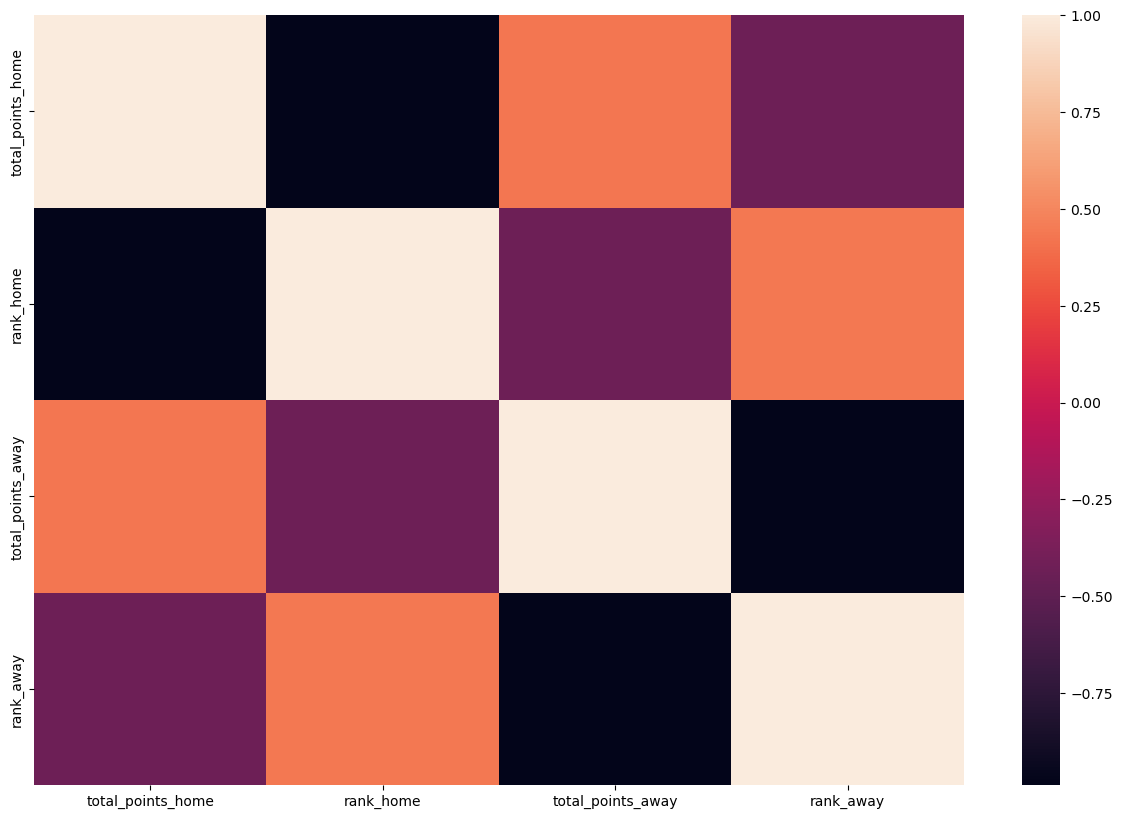

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(df[["total_points_home", "rank_home", "total_points_away", "rank_away"]].corr())
plt.show()

In [20]:
df["rank_dif"] = df["rank_home"] - df["rank_away"]
df["sg"] = df["home_score"] - df["away_score"]
df["points_home_by_rank"] = df["home_team_points"]/df["rank_away"]
df["points_away_by_rank"] = df["away_team_points"]/df["rank_home"]

In [21]:
home_team = df[["date", "home_team", "home_score", "away_score", "rank_home", "rank_away","rank_change_home", "total_points_home", "result", "rank_dif", "points_home_by_rank", "home_team_points"]]

away_team = df[["date", "away_team", "away_score", "home_score", "rank_away", "rank_home","rank_change_away", "total_points_away", "result", "rank_dif", "points_away_by_rank", "away_team_points"]]

In [22]:
home_team.columns = [h.replace("home_", "").replace("_home", "").replace("away_", "suf_").replace("_away", "_suf") for h in home_team.columns]

away_team.columns = [a.replace("away_", "").replace("_away", "").replace("home_", "suf_").replace("_home", "_suf") for a in away_team.columns]

In [23]:
team_stats = pd.concat([home_team, away_team]).sort_values("date").reset_index(drop=True)


In [24]:
#this column will be used to calculate features for simulation
team_stats_raw = team_stats.copy()

### 
Takımın son 4 senedeki ortalama golleri.

Takımın son 5 maçındaki ortalama golleri.

Takımın son 4 senedeki yediği ortalama goller.

Takımın son 5 maçında yediği ortalama goller.

Takımın son 4 senedeki karşılaştığı ortalama FIFA Sıralaması.

Takımın son 5 maçında karşılaştığı ortalama FIFA Sıralaması.

Son 4 senedeki kazanılan FIFA Puanları.

Son 5 maçta kazanılan FIFA Puanları.

Son 4 senedeki maç puanları.

Son 5 maçtaki ortalama maç puanları.

Son 4 senedeki karşılaşılan sıralamaya göre ortalama maç puanları.

Son 5 maçta karşılaşılan sıralamaya göre ortalama maç puanları.

In [77]:
stats_val = []

for index, row in team_stats.iterrows():
    team = row["team"]
    date = row["date"]
    past_games = team_stats.loc[(team_stats["team"] == team) & (team_stats["date"] < date)].sort_values(by=['date'], ascending=False)
    last5 = past_games.head(5)
    
    goals = past_games["score"].mean()
    goals_l5 = last5["score"].mean()
    
    goals_suf = past_games["suf_score"].mean()
    goals_suf_l5 = last5["suf_score"].mean()
    
    rank = past_games["rank_suf"].mean()
    rank_l5 = last5["rank_suf"].mean()
    
    if len(last5) > 0:
        points = past_games["total_points"].values[0] - past_games["total_points"].values[-1]#qtd de pontos ganhos
        points_l5 = last5["total_points"].values[0] - last5["total_points"].values[-1] 
    else:
        points = 0
        points_l5 = 0
        
    gp = past_games["team_points"].mean()
    gp_l5 = last5["team_points"].mean()
    
    gp_rank = past_games["points_by_rank"].mean()
    gp_rank_l5 = last5["points_by_rank"].mean()
    
    stats_val.append([goals, goals_l5, goals_suf, goals_suf_l5, rank, rank_l5, points, points_l5, gp, gp_l5, gp_rank, gp_rank_l5])

In [26]:
stats_cols = ["goals_mean", "goals_mean_l5", "goals_suf_mean", "goals_suf_mean_l5", "rank_mean", "rank_mean_l5", "points_mean", "points_mean_l5", "game_points_mean", "game_points_mean_l5", "game_points_rank_mean", "game_points_rank_mean_l5"]

stats_df = pd.DataFrame(stats_val, columns=stats_cols)

full_df = pd.concat([team_stats.reset_index(drop=True), stats_df], axis=1, ignore_index=False)

In [27]:
home_team_stats = full_df.iloc[:int(full_df.shape[0]/2),:]
away_team_stats = full_df.iloc[int(full_df.shape[0]/2):,:]

In [28]:
home_team_stats.columns[-12:]

Index(['goals_mean', 'goals_mean_l5', 'goals_suf_mean', 'goals_suf_mean_l5',
       'rank_mean', 'rank_mean_l5', 'points_mean', 'points_mean_l5',
       'game_points_mean', 'game_points_mean_l5', 'game_points_rank_mean',
       'game_points_rank_mean_l5'],
      dtype='object')

In [29]:
home_team_stats = home_team_stats[home_team_stats.columns[-12:]]
away_team_stats = away_team_stats[away_team_stats.columns[-12:]]

In [30]:
home_team_stats.columns = ['home_'+str(col) for col in home_team_stats.columns]
away_team_stats.columns = ['away_'+str(col) for col in away_team_stats.columns]

In [31]:
match_stats = pd.concat([home_team_stats, away_team_stats.reset_index(drop=True)], axis=1, ignore_index=False)

In [32]:
full_df = pd.concat([df, match_stats.reset_index(drop=True)], axis=1, ignore_index=False)

In [33]:
full_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'total_points_home',
       'previous_points_home', 'rank_home', 'rank_change_home',
       'total_points_away', 'previous_points_away', 'rank_away',
       'rank_change_away', 'result', 'home_team_points', 'away_team_points',
       'rank_dif', 'sg', 'points_home_by_rank', 'points_away_by_rank',
       'home_goals_mean', 'home_goals_mean_l5', 'home_goals_suf_mean',
       'home_goals_suf_mean_l5', 'home_rank_mean', 'home_rank_mean_l5',
       'home_points_mean', 'home_points_mean_l5', 'home_game_points_mean',
       'home_game_points_mean_l5', 'home_game_points_rank_mean',
       'home_game_points_rank_mean_l5', 'away_goals_mean',
       'away_goals_mean_l5', 'away_goals_suf_mean', 'away_goals_suf_mean_l5',
       'away_rank_mean', 'away_rank_mean_l5', 'away_points_mean',
       'away_points_mean_l5', 'away_game_points_mean',
       'away_game_points_mean_l5', 'away_

In [34]:
def find_friendly(x):
    if x == "Friendly":
        return 1
    else: return 0

full_df["is_friendly"] = full_df["tournament"].apply(lambda x: find_friendly(x)) 

In [35]:
full_df = pd.get_dummies(full_df, columns=["is_friendly"])

In [36]:
full_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'total_points_home',
       'previous_points_home', 'rank_home', 'rank_change_home',
       'total_points_away', 'previous_points_away', 'rank_away',
       'rank_change_away', 'result', 'home_team_points', 'away_team_points',
       'rank_dif', 'sg', 'points_home_by_rank', 'points_away_by_rank',
       'home_goals_mean', 'home_goals_mean_l5', 'home_goals_suf_mean',
       'home_goals_suf_mean_l5', 'home_rank_mean', 'home_rank_mean_l5',
       'home_points_mean', 'home_points_mean_l5', 'home_game_points_mean',
       'home_game_points_mean_l5', 'home_game_points_rank_mean',
       'home_game_points_rank_mean_l5', 'away_goals_mean',
       'away_goals_mean_l5', 'away_goals_suf_mean', 'away_goals_suf_mean_l5',
       'away_rank_mean', 'away_rank_mean_l5', 'away_points_mean',
       'away_points_mean_l5', 'away_game_points_mean',
       'away_game_points_mean_l5', 'away_

In [37]:
base_df = full_df[["date", "home_team", "away_team", "rank_home", "rank_away","home_score", "away_score","result", "rank_dif", "rank_change_home", "rank_change_away", 'home_goals_mean',
       'home_goals_mean_l5', 'home_goals_suf_mean', 'home_goals_suf_mean_l5',
       'home_rank_mean', 'home_rank_mean_l5', 'home_points_mean',
       'home_points_mean_l5', 'away_goals_mean', 'away_goals_mean_l5',
       'away_goals_suf_mean', 'away_goals_suf_mean_l5', 'away_rank_mean',
       'away_rank_mean_l5', 'away_points_mean', 'away_points_mean_l5','home_game_points_mean', 'home_game_points_mean_l5',
       'home_game_points_rank_mean', 'home_game_points_rank_mean_l5','away_game_points_mean',
       'away_game_points_mean_l5', 'away_game_points_rank_mean',
       'away_game_points_rank_mean_l5',
       'is_friendly_0', 'is_friendly_1']]

base_df.tail()

,date,home_team,away_team,rank_home,rank_away,home_score,away_score,result,rank_dif,rank_change_home,...,home_game_points_mean,home_game_points_mean_l5,home_game_points_rank_mean,home_game_points_rank_mean_l5,away_game_points_mean,away_game_points_mean_l5,away_game_points_rank_mean,away_game_points_rank_mean_l5,is_friendly_0,is_friendly_1
1142,2024-02-02,Nigeria,Angola,42.0,117.0,1,0,0,-75.0,0.0,...,1.333333,1.333333,0.009425,0.009425,1.571429,2.4,0.025571,0.024923,True,False
1143,2024-02-03,Qatar,Uzbekistan,58.0,68.0,1,1,2,-10.0,0.0,...,3.000000,3.000000,0.031635,0.031635,1.875000,1.6,0.045532,0.059865,True,False
1144,2024-02-03,Costa Rica,El Salvador,52.0,78.0,2,0,0,-26.0,0.0,...,0.500000,0.500000,0.003403,0.003403,1.466667,2.0,0.016069,0.026270,False,True
1145,2024-02-07,Nigeria,South Africa,42.0,66.0,1,1,2,-24.0,0.0,...,2.000000,2.000000,0.060606,0.060606,1.551724,2.6,0.025196,0.027865,True,False
1146,2024-02-10,Qatar,Jordan,58.0,87.0,3,1,0,-29.0,0.0,...,1.428571,1.800000,0.024253,0.031870,1.562500,1.8,0.018976,0.019800,True,False


In [38]:
base_df.isna().sum()

date                               0
home_team                          0
away_team                          0
rank_home                          0
rank_away                          0
home_score                         0
away_score                         0
result                             0
rank_dif                           0
rank_change_home                   0
rank_change_away                   0
home_goals_mean                  178
home_goals_mean_l5               178
home_goals_suf_mean              178
home_goals_suf_mean_l5           178
home_rank_mean                   178
home_rank_mean_l5                178
home_points_mean                   0
home_points_mean_l5                0
away_goals_mean                   10
away_goals_mean_l5                10
away_goals_suf_mean               10
away_goals_suf_mean_l5            10
away_rank_mean                    10
away_rank_mean_l5                 10
away_points_mean                   0
away_points_mean_l5                0
h

In [39]:
base_df_no_fg = base_df.dropna()

In [40]:
df = base_df_no_fg

In [41]:
def no_draw(x):
    if x == 2:
        return 1
    else:
        return x
    
df["target"] = df["result"].apply(lambda x: no_draw(x))

C:\Users\erens\AppData\Local\Temp\ipykernel_29864\1906038641.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["target"] = df["result"].apply(lambda x: no_draw(x))


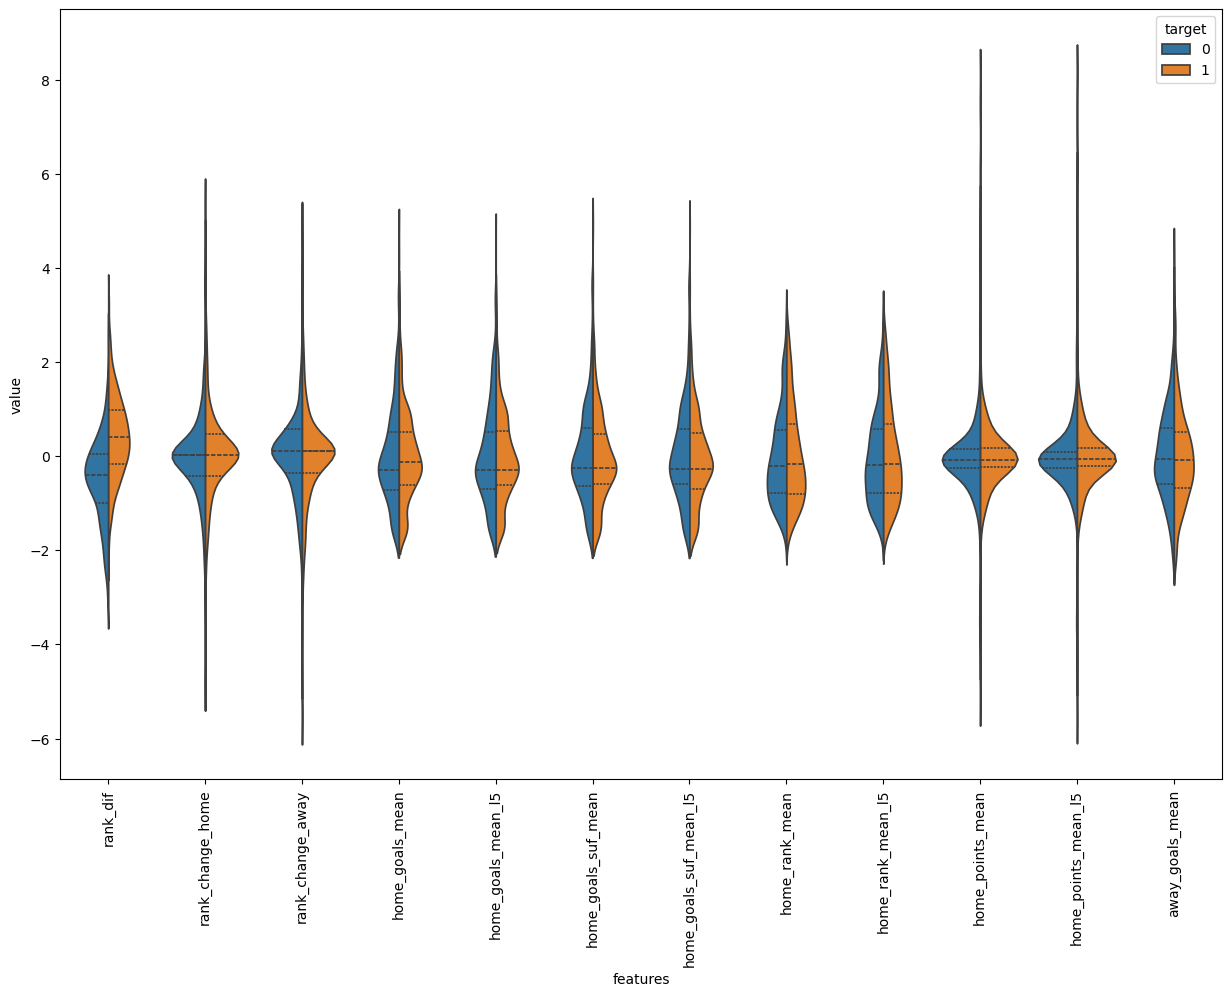

In [42]:
data1 = df[list(df.columns[8:20].values) + ["target"]]
data2 = df[df.columns[20:]]
scaled = (data1[:-1] - data1[:-1].mean()) / data1[:-1].std()
scaled["target"] = data1["target"]
violin1 = pd.melt(scaled,id_vars="target", var_name="features", value_name="value")

scaled = (data2[:-1] - data2[:-1].mean()) / data2[:-1].std()
scaled["target"] = data2["target"]
violin2 = pd.melt(scaled,id_vars="target", var_name="features", value_name="value")
plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="target", data=violin1,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

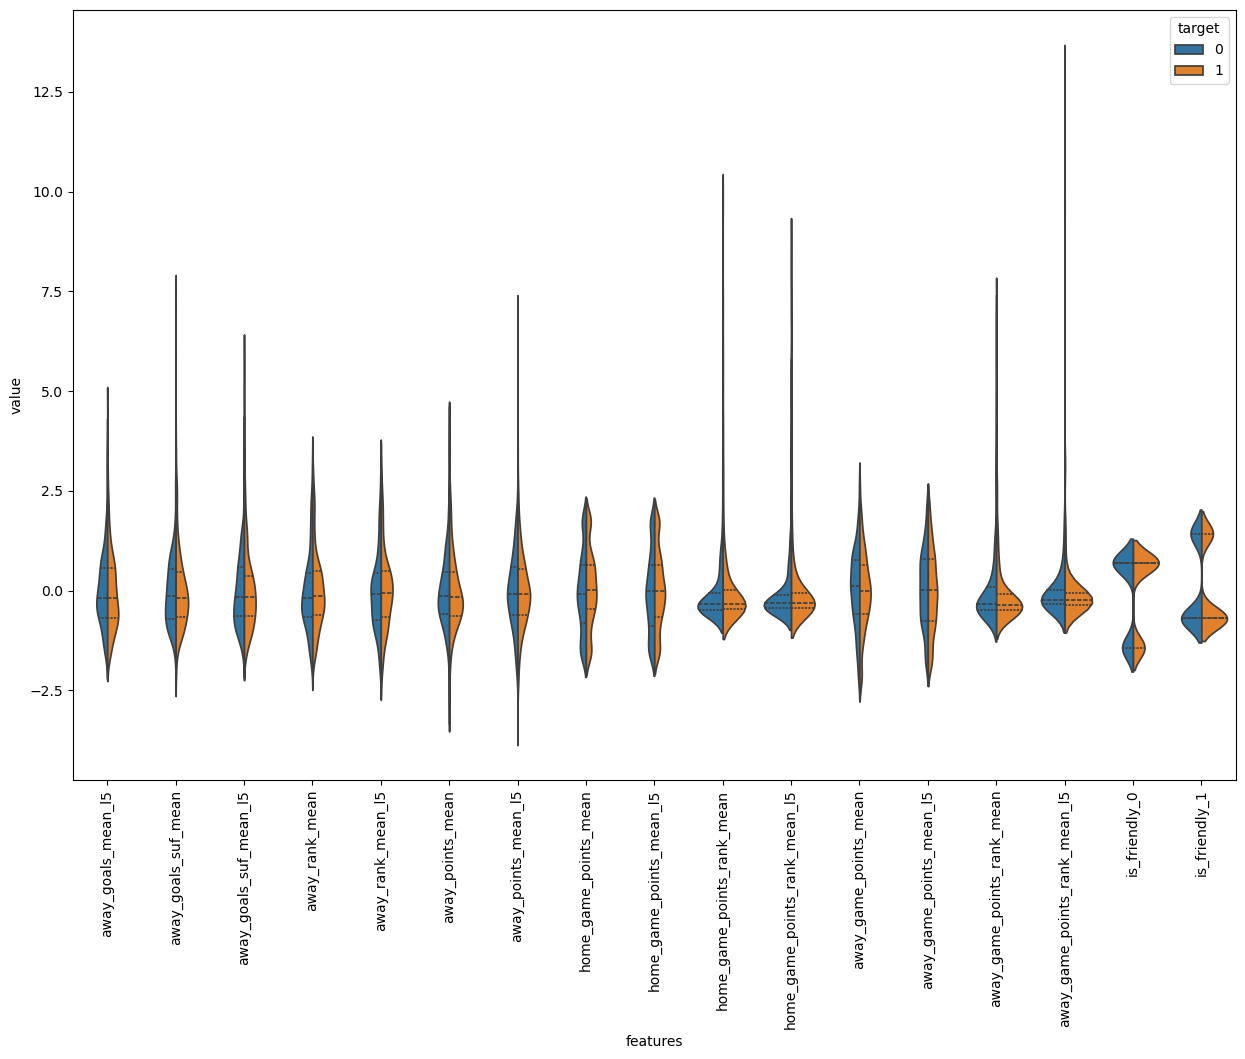

In [43]:
plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="target", data=violin2,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

In [44]:
dif = df.copy()
dif.loc[:, "goals_dif"] = dif["home_goals_mean"] - dif["away_goals_mean"]
dif.loc[:, "goals_dif_l5"] = dif["home_goals_mean_l5"] - dif["away_goals_mean_l5"]
dif.loc[:, "goals_suf_dif"] = dif["home_goals_suf_mean"] - dif["away_goals_suf_mean"]
dif.loc[:, "goals_suf_dif_l5"] = dif["home_goals_suf_mean_l5"] - dif["away_goals_suf_mean_l5"]
dif.loc[:, "goals_made_suf_dif"] = dif["home_goals_mean"] - dif["away_goals_suf_mean"]
dif.loc[:, "goals_made_suf_dif_l5"] = dif["home_goals_mean_l5"] - dif["away_goals_suf_mean_l5"]
dif.loc[:, "goals_suf_made_dif"] = dif["home_goals_suf_mean"] - dif["away_goals_mean"]
dif.loc[:, "goals_suf_made_dif_l5"] = dif["home_goals_suf_mean_l5"] - dif["away_goals_mean_l5"]

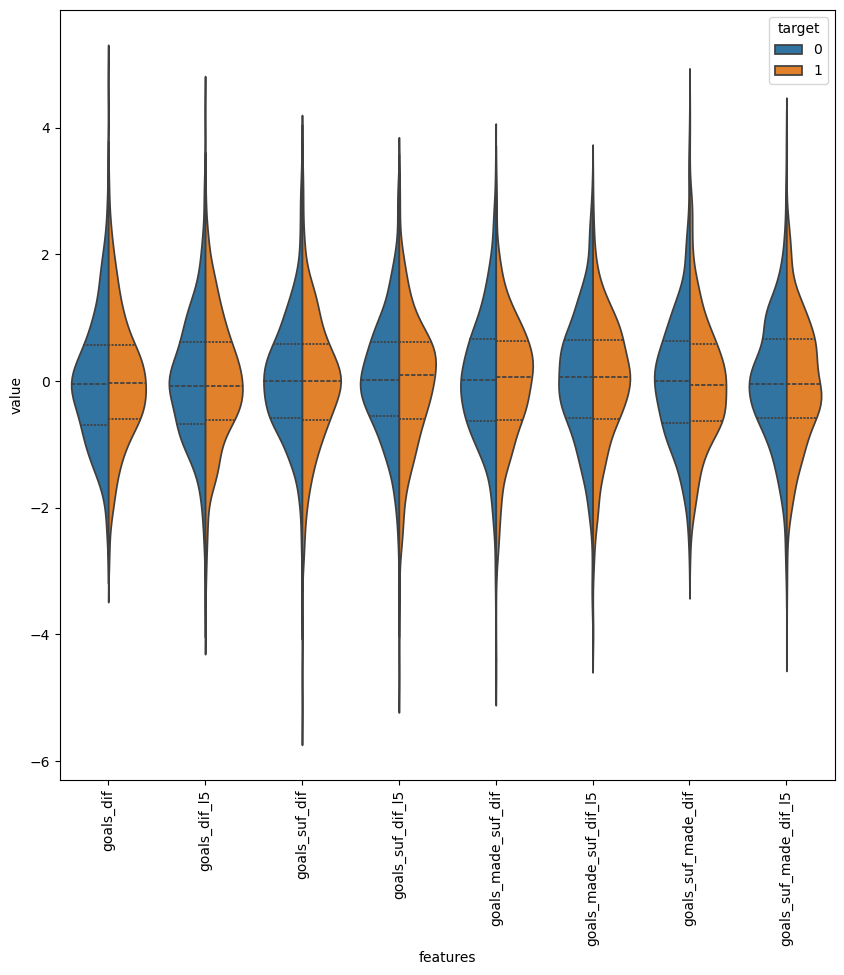

In [45]:
data_difs = dif.iloc[:, -8:]
scaled = (data_difs - data_difs.mean()) / data_difs.std()
scaled["target"] = data2["target"]
violin = pd.melt(scaled,id_vars="target", var_name="features", value_name="value")

plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="target", data=violin,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

In [46]:
dif.loc[:, "dif_points"] = dif["home_game_points_mean"] - dif["away_game_points_mean"]
dif.loc[:, "dif_points_l5"] = dif["home_game_points_mean_l5"] - dif["away_game_points_mean_l5"]
dif.loc[:, "dif_points_rank"] = dif["home_game_points_rank_mean"] - dif["away_game_points_rank_mean"]
dif.loc[:, "dif_points_rank_l5"] = dif["home_game_points_rank_mean_l5"] - dif["away_game_points_rank_mean_l5"]
dif.loc[:, "dif_rank_agst"] = dif["home_rank_mean"] - dif["away_rank_mean"]
dif.loc[:, "dif_rank_agst_l5"] = dif["home_rank_mean_l5"] - dif["away_rank_mean_l5"]

In [47]:
dif.loc[:, "goals_per_ranking_dif"] = (dif["home_goals_mean"] / dif["home_rank_mean"]) - (dif["away_goals_mean"] / dif["away_rank_mean"])
dif.loc[:, "goals_per_ranking_suf_dif"] = (dif["home_goals_suf_mean"] / dif["home_rank_mean"]) - (dif["away_goals_suf_mean"] / dif["away_rank_mean"])
dif.loc[:, "goals_per_ranking_dif_l5"] = (dif["home_goals_mean_l5"] / dif["home_rank_mean"]) - (dif["away_goals_mean_l5"] / dif["away_rank_mean"])
dif.loc[:, "goals_per_ranking_suf_dif_l5"] = (dif["home_goals_suf_mean_l5"] / dif["home_rank_mean"]) - (dif["away_goals_suf_mean_l5"] / dif["away_rank_mean"])

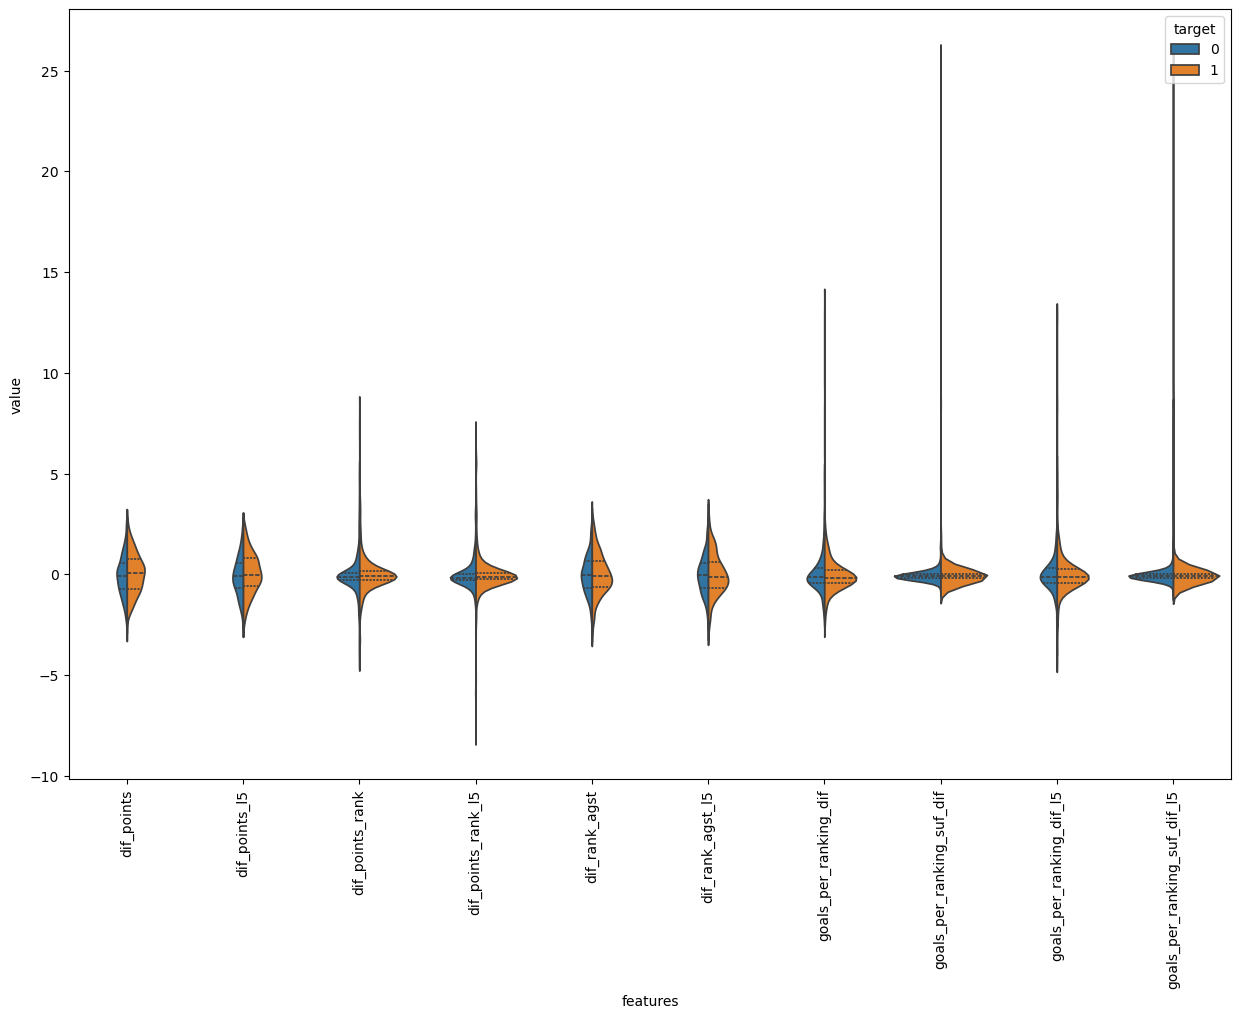

In [48]:
data_difs = dif.iloc[:, -10:]
scaled = (data_difs - data_difs.mean()) / data_difs.std()
scaled["target"] = data2["target"]
violin = pd.melt(scaled,id_vars="target", var_name="features", value_name="value")

plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="target", data=violin,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

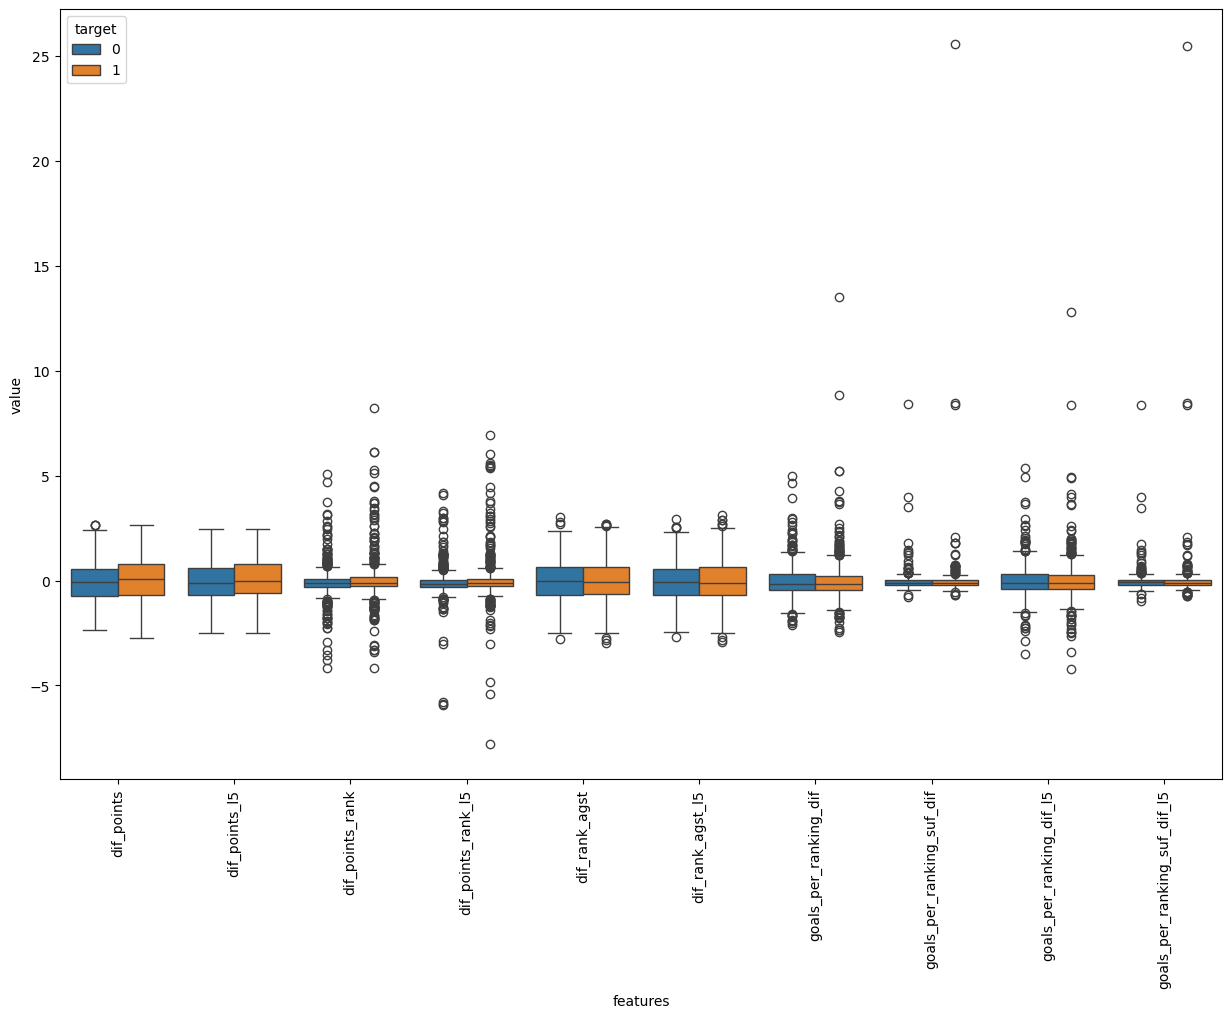

In [49]:
plt.figure(figsize=(15,10))
sns.boxplot(x="features", y="value", hue="target", data=violin)
plt.xticks(rotation=90)
plt.show()

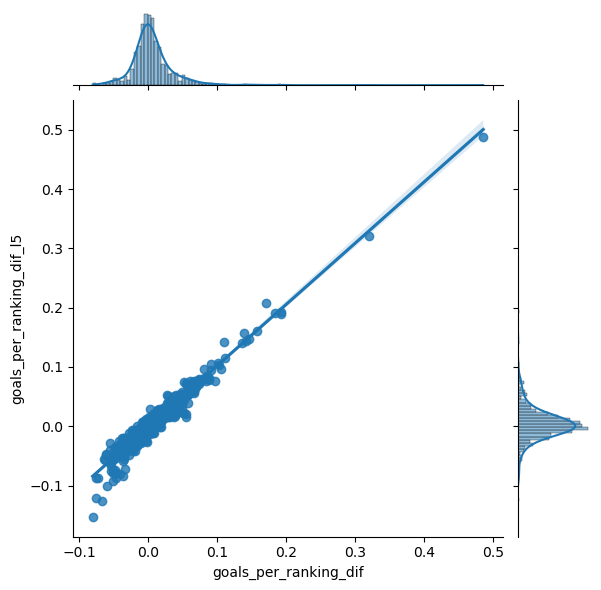

In [50]:
sns.jointplot(data = data_difs, x = 'goals_per_ranking_dif', y = 'goals_per_ranking_dif_l5', kind="reg")
plt.show()

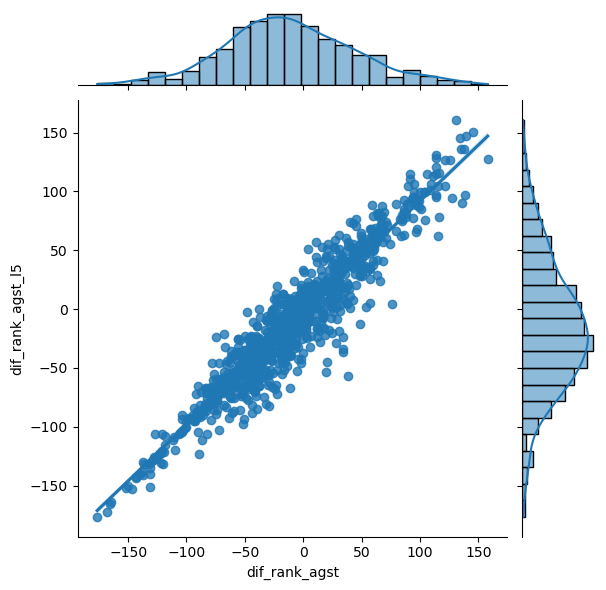

In [51]:
sns.jointplot(data = data_difs, x = 'dif_rank_agst', y = 'dif_rank_agst_l5', kind="reg")
plt.show()

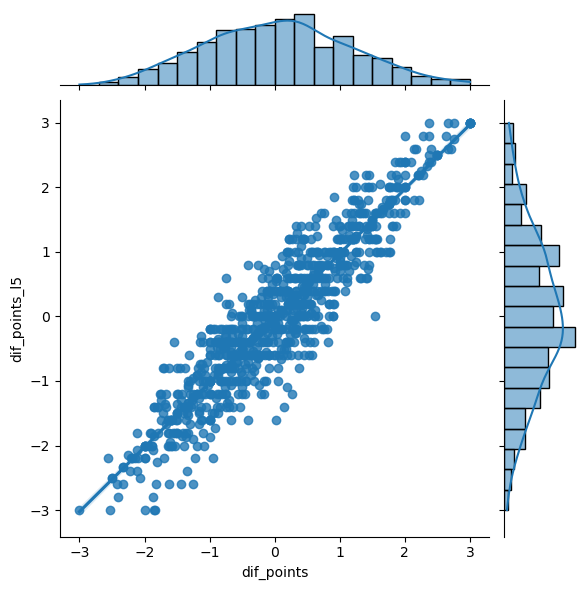

In [52]:
sns.jointplot(data = data_difs, x = 'dif_points', y = 'dif_points_l5', kind="reg")
plt.show()

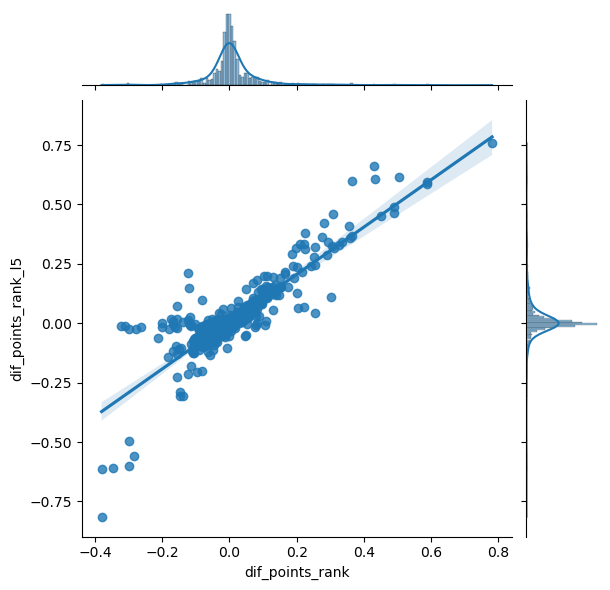

In [53]:
sns.jointplot(data = data_difs, x = 'dif_points_rank', y = 'dif_points_rank_l5', kind="reg")
plt.show()

In [54]:
def create_db(df):
    columns = ["home_team", "away_team", "target", "rank_dif", "home_goals_mean", "home_rank_mean", "away_goals_mean", "away_rank_mean", "home_rank_mean_l5", "away_rank_mean_l5", "home_goals_suf_mean", "away_goals_suf_mean", "home_goals_mean_l5", "away_goals_mean_l5", "home_goals_suf_mean_l5", "away_goals_suf_mean_l5", "home_game_points_rank_mean", "home_game_points_rank_mean_l5", "away_game_points_rank_mean", "away_game_points_rank_mean_l5","is_friendly_0", "is_friendly_1"]
    
    base = df.loc[:, columns]
    base.loc[:, "goals_dif"] = base["home_goals_mean"] - base["away_goals_mean"]
    base.loc[:, "goals_dif_l5"] = base["home_goals_mean_l5"] - base["away_goals_mean_l5"]
    base.loc[:, "goals_suf_dif"] = base["home_goals_suf_mean"] - base["away_goals_suf_mean"]
    base.loc[:, "goals_suf_dif_l5"] = base["home_goals_suf_mean_l5"] - base["away_goals_suf_mean_l5"]
    base.loc[:, "goals_per_ranking_dif"] = (base["home_goals_mean"] / base["home_rank_mean"]) - (base["away_goals_mean"] / base["away_rank_mean"])
    base.loc[:, "dif_rank_agst"] = base["home_rank_mean"] - base["away_rank_mean"]
    base.loc[:, "dif_rank_agst_l5"] = base["home_rank_mean_l5"] - base["away_rank_mean_l5"]
    base.loc[:, "dif_points_rank"] = base["home_game_points_rank_mean"] - base["away_game_points_rank_mean"]
    base.loc[:, "dif_points_rank_l5"] = base["home_game_points_rank_mean_l5"] - base["away_game_points_rank_mean_l5"]
    
    model_df = base[["home_team", "away_team", "target", "rank_dif", "goals_dif", "goals_dif_l5", "goals_suf_dif", "goals_suf_dif_l5", "goals_per_ranking_dif", "dif_rank_agst", "dif_rank_agst_l5", "dif_points_rank", "dif_points_rank_l5", "is_friendly_0", "is_friendly_1"]]
    return model_df

In [55]:
model_db = create_db(df)
model_db

,home_team,away_team,target,rank_dif,goals_dif,goals_dif_l5,goals_suf_dif,goals_suf_dif_l5,goals_per_ranking_dif,dif_rank_agst,dif_rank_agst_l5,dif_points_rank,dif_points_rank_l5,is_friendly_0,is_friendly_1
9,Cambodia,Bangladesh,1,-18.0,-0.555556,-1.000000,-0.333333,-0.400000,-0.007215,86.000000,82.400000,-0.003003,-0.005405,False,True
81,Iraq,Syria,0,-19.0,0.000000,0.000000,-1.400000,-1.400000,0.074405,-100.000000,-100.000000,0.242507,0.242507,True,False
92,Argentina,Jamaica,0,-59.0,2.230769,2.600000,-1.230769,-0.400000,0.101230,-50.846154,-46.400000,0.097889,0.087646,False,True
99,Egypt,Liberia,0,-110.0,-0.625000,-0.200000,-1.375000,-1.400000,-0.008183,-26.375000,-1.800000,-0.004397,-0.003974,False,True
104,Madagascar,Benin,0,14.0,2.000000,2.000000,-1.500000,-1.500000,0.012658,-2.000000,-2.000000,0.018987,0.018987,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142,Nigeria,Angola,0,-75.0,0.238095,0.066667,-0.476190,0.066667,-0.005671,48.869048,27.733333,-0.016146,-0.015499,True,False
1143,Qatar,Uzbekistan,1,-10.0,0.125000,0.300000,-0.687500,-0.400000,0.002448,-8.062500,24.000000,-0.013897,-0.028230,True,False
1144,Costa Rica,El Salvador,0,-26.0,-0.633333,-0.500000,0.666667,1.400000,-0.007777,9.516667,10.450000,-0.012667,-0.022867,False,True
1145,Nigeria,South Africa,1,-24.0,0.086207,-0.100000,-0.137931,0.600000,0.026411,-41.241379,-58.800000,0.035410,0.032741,True,False


# Model

In [56]:
X = model_db.iloc[:, 3:]
y = model_db[["target"]]

In [57]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

import numpy as np


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1)

In [59]:
gb = GradientBoostingClassifier(random_state=5)

params = {"learning_rate": [0.01, 0.1, 0.5],
            "min_samples_split": [5, 10],
            "min_samples_leaf": [3, 5],
            "max_depth":[3,5,10],
            "max_features":["sqrt"],
            "n_estimators":[100, 200]
         } 

gb_cv = GridSearchCV(gb, params, cv = 3, n_jobs = -1, verbose = False)

gb_cv.fit(X_train.values, np.ravel(y_train))

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=5),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 10], 'max_features': ['sqrt'],
                         'min_samples_leaf': [3, 5],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 200]},
             verbose=False)

In [60]:
gb = gb_cv.best_estimator_
gb

GradientBoostingClassifier(learning_rate=0.01, max_features='sqrt',
                           min_samples_leaf=3, min_samples_split=10,
                           random_state=5)

In [61]:
params_rf = {"max_depth": [20],
                "min_samples_split": [10],
                "max_leaf_nodes": [175],
                "min_samples_leaf": [5],
                "n_estimators": [250],
                 "max_features": ["sqrt"],
                }

rf = RandomForestClassifier(random_state=1)

rf_cv = GridSearchCV(rf, params_rf, cv = 3, n_jobs = -1, verbose = False)

rf_cv.fit(X_train.values, np.ravel(y_train))

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [20], 'max_features': ['sqrt'],
                         'max_leaf_nodes': [175], 'min_samples_leaf': [5],
                         'min_samples_split': [10], 'n_estimators': [250]},
             verbose=False)

In [62]:
rf = rf_cv.best_estimator_
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [63]:
def analyze(model):
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test.values)[:,1]) #test AUC
    plt.figure(figsize=(15,10))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label="test")

    fpr_train, tpr_train, _ = roc_curve(y_train, model.predict_proba(X_train.values)[:,1]) #train AUC
    plt.plot(fpr_train, tpr_train, label="train")
    auc_test = roc_auc_score(y_test, model.predict_proba(X_test.values)[:,1])
    auc_train = roc_auc_score(y_train, model.predict_proba(X_train.values)[:,1])
    plt.legend()
    plt.title('AUC score is %.2f on test and %.2f on training'%(auc_test, auc_train))
    plt.show()
    
    plt.figure(figsize=(15, 10))
    cm = confusion_matrix(y_test, model.predict(X_test.values))
    sns.heatmap(cm, annot=True, fmt="d")

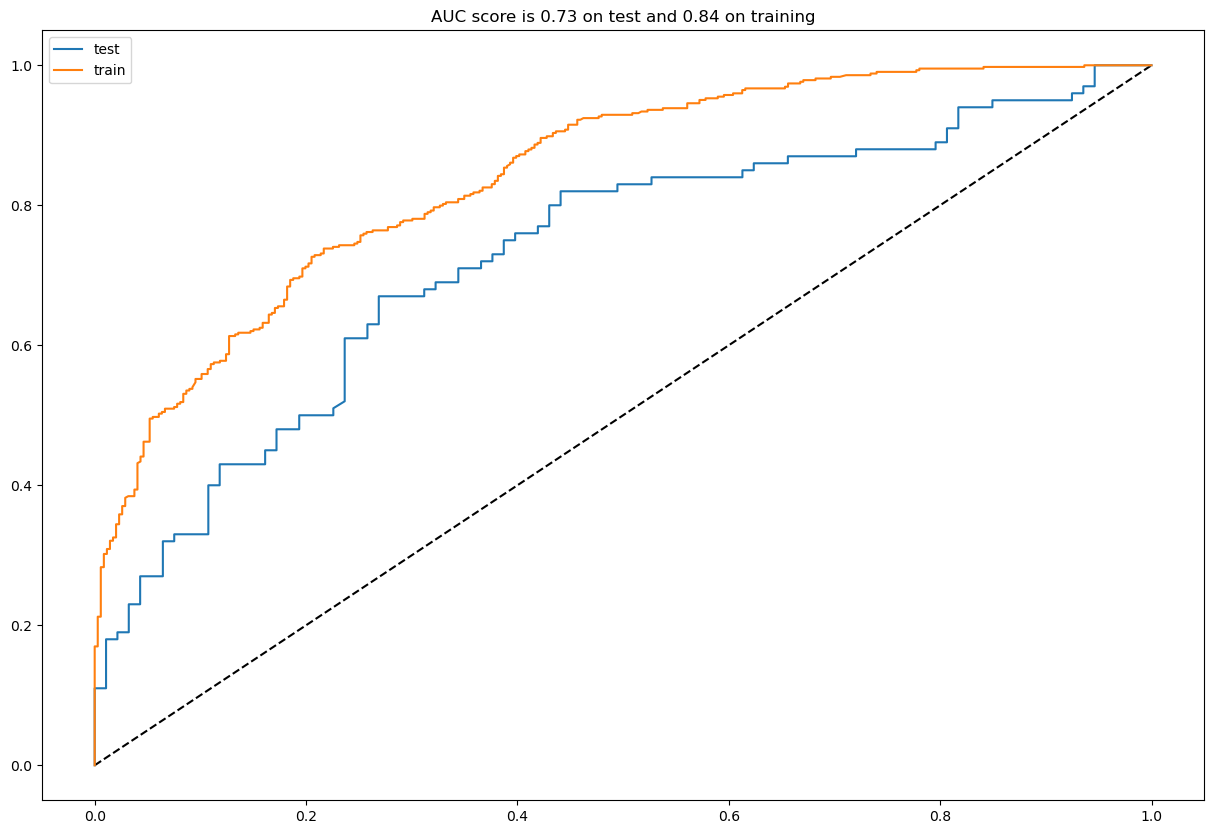

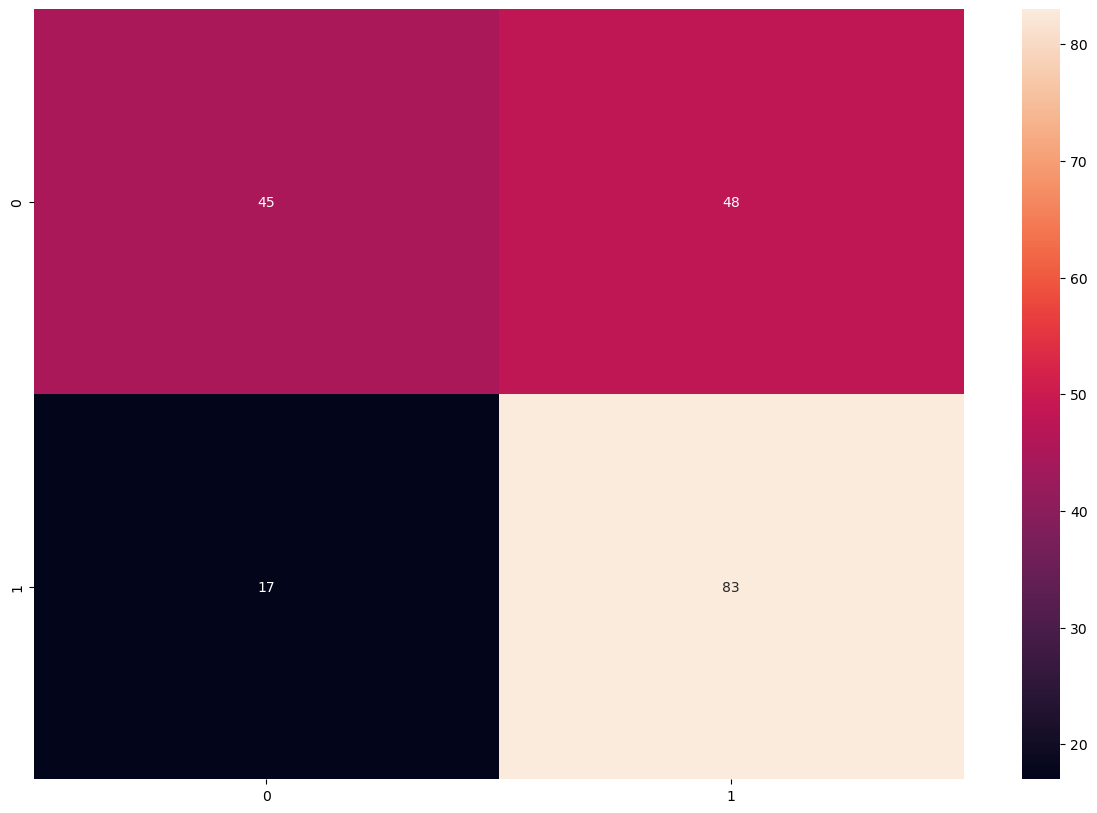

In [64]:
analyze (gb)

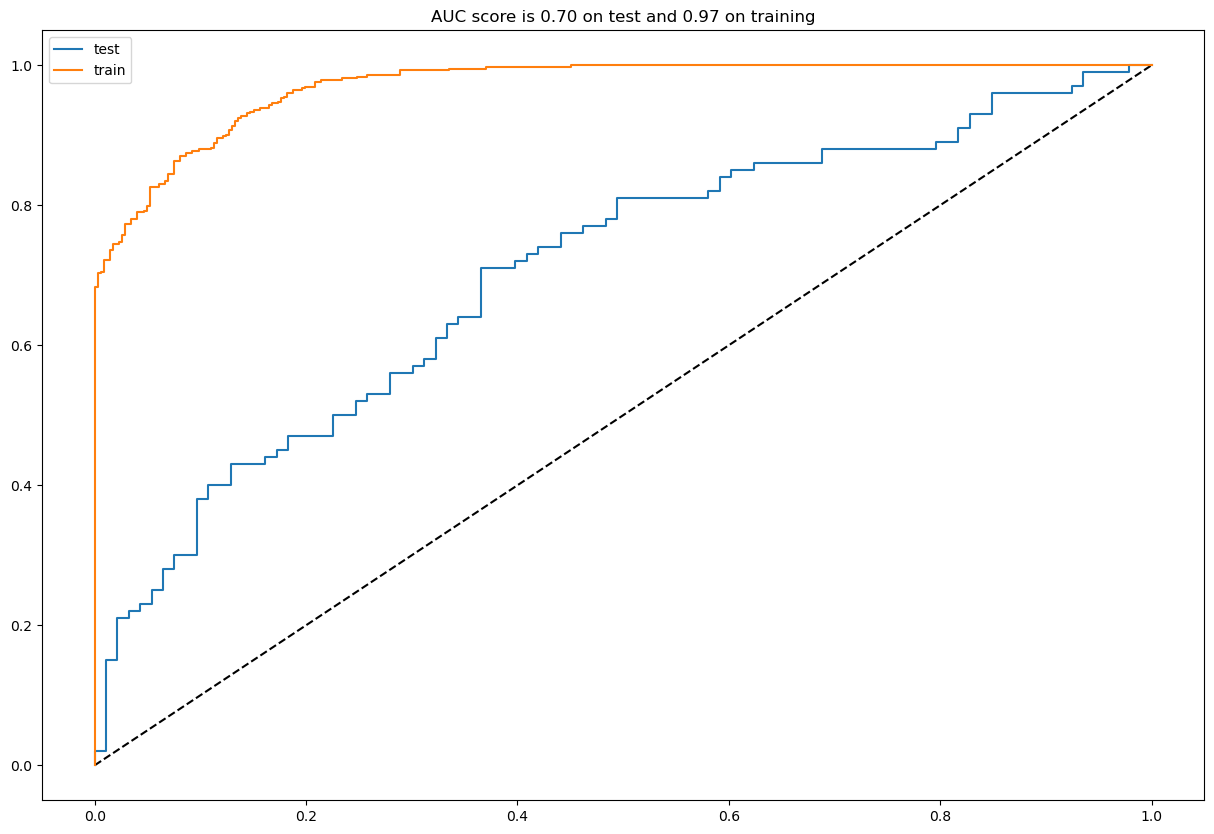

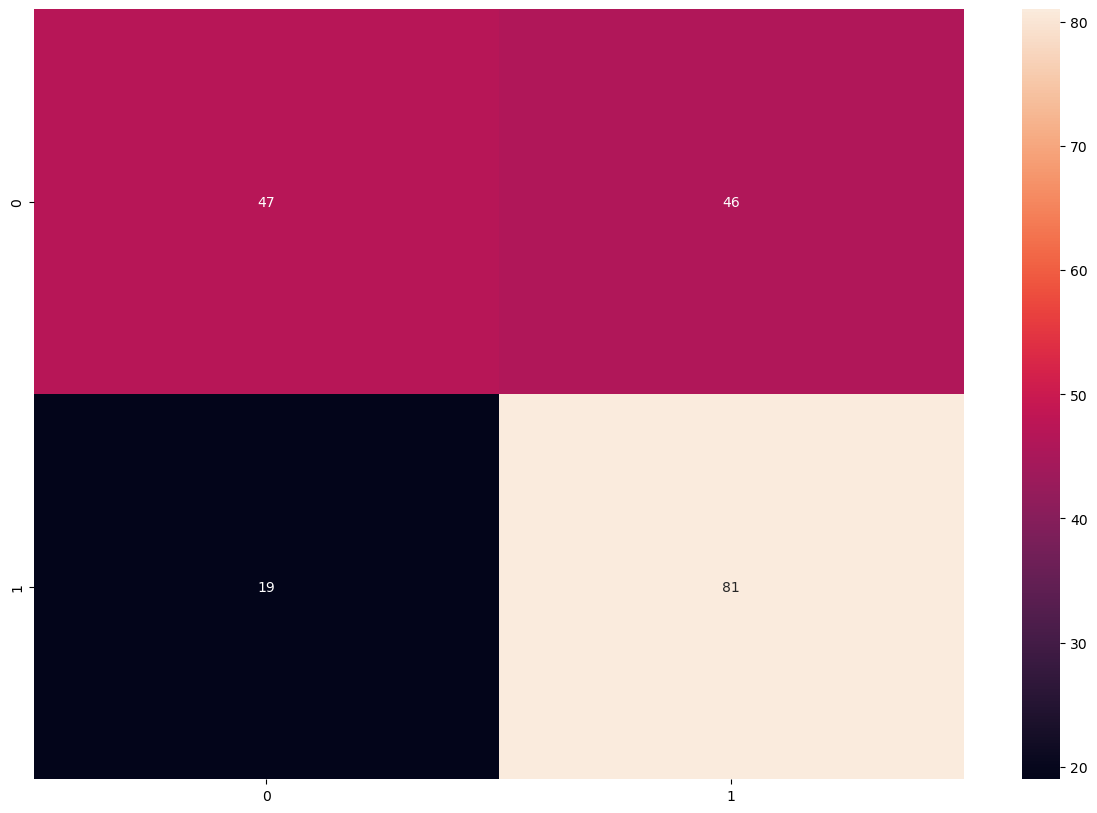

In [65]:
analyze(rf)

In [66]:
from operator import itemgetter

# UEFA EURO 2024 SIM

In [67]:
import pandas as pd


df = pd.read_csv('euro24teams.csv')

print(df)

             Team Group  Position
0         Germany     A         1
1        Scotland     A         2
2         Hungary     A         3
3     Switzerland     A         4
4           Spain     B         1
5         Albania     B         2
6           Italy     B         3
7         Croatia     B         4
8         England     C         1
9         Denmark     C         2
10         Serbia     C         3
11       Slovenia     C         4
12         France     D         1
13        Austria     D         2
14    Netherlands     D         3
15         Poland     D         4
16        Belgium     E         1
17       Slovakia     E         2
18        Romania     E         3
19        Ukraine     E         4
20       Portugal     F         1
21         Turkey     F         2
22        Czechia     F         3
23        Georgia     F         4


In [68]:
import pandas as pd
from itertools import combinations

df_teams = pd.read_csv("euro24teams.csv")

groups = df_teams["Group"].unique()

table = {}
matches = []

for group_name in groups:
    group_teams = df_teams[df_teams["Group"] == group_name]["Team"].tolist()
    # Temizleme işlemi
    group_teams = [team.strip().replace("\xa0", "") for team in group_teams]
    table[group_name] = [[team, 0, []] for team in group_teams]

    # Her grup için tüm olası maç kombinasyonlarını oluştur
    group_matches = list(combinations(group_teams, 2))
    for match in group_matches:
        matches.append((group_name, match[0], match[1]))

In [69]:
table

{'A': [['Germany', 0, []],
  ['Scotland', 0, []],
  ['Hungary', 0, []],
  ['Switzerland', 0, []]],
 'B': [['Spain', 0, []],
  ['Albania', 0, []],
  ['Italy', 0, []],
  ['Croatia', 0, []]],
 'C': [['England', 0, []],
  ['Denmark', 0, []],
  ['Serbia', 0, []],
  ['Slovenia', 0, []]],
 'D': [['France', 0, []],
  ['Austria', 0, []],
  ['Netherlands', 0, []],
  ['Poland', 0, []]],
 'E': [['Belgium', 0, []],
  ['Slovakia', 0, []],
  ['Romania', 0, []],
  ['Ukraine', 0, []]],
 'F': [['Portugal', 0, []],
  ['Turkey', 0, []],
  ['Czechia', 0, []],
  ['Georgia', 0, []]]}

In [70]:
matches

[('A', 'Germany', 'Scotland'),
 ('A', 'Germany', 'Hungary'),
 ('A', 'Germany', 'Switzerland'),
 ('A', 'Scotland', 'Hungary'),
 ('A', 'Scotland', 'Switzerland'),
 ('A', 'Hungary', 'Switzerland'),
 ('B', 'Spain', 'Albania'),
 ('B', 'Spain', 'Italy'),
 ('B', 'Spain', 'Croatia'),
 ('B', 'Albania', 'Italy'),
 ('B', 'Albania', 'Croatia'),
 ('B', 'Italy', 'Croatia'),
 ('C', 'England', 'Denmark'),
 ('C', 'England', 'Serbia'),
 ('C', 'England', 'Slovenia'),
 ('C', 'Denmark', 'Serbia'),
 ('C', 'Denmark', 'Slovenia'),
 ('C', 'Serbia', 'Slovenia'),
 ('D', 'France', 'Austria'),
 ('D', 'France', 'Netherlands'),
 ('D', 'France', 'Poland'),
 ('D', 'Austria', 'Netherlands'),
 ('D', 'Austria', 'Poland'),
 ('D', 'Netherlands', 'Poland'),
 ('E', 'Belgium', 'Slovakia'),
 ('E', 'Belgium', 'Romania'),
 ('E', 'Belgium', 'Ukraine'),
 ('E', 'Slovakia', 'Romania'),
 ('E', 'Slovakia', 'Ukraine'),
 ('E', 'Romania', 'Ukraine'),
 ('F', 'Portugal', 'Turkey'),
 ('F', 'Portugal', 'Czechia'),
 ('F', 'Portugal', 'Georgia

In [71]:
def find_stats(team_1):
    past_games = team_stats_raw[(team_stats_raw["team"] == team_1)].sort_values("date")
    last5 = team_stats_raw[(team_stats_raw["team"] == team_1)].sort_values("date").tail(5)

    team_1_rank = past_games["rank"].values[-1]
    team_1_goals = past_games.score.mean()
    team_1_goals_l5 = last5.score.mean()
    team_1_goals_suf = past_games.suf_score.mean()
    team_1_goals_suf_l5 = last5.suf_score.mean()
    team_1_rank_suf = past_games.rank_suf.mean()
    team_1_rank_suf_l5 = last5.rank_suf.mean()
    team_1_gp_rank = past_games.points_by_rank.mean()
    team_1_gp_rank_l5 = last5.points_by_rank.mean()

    return [team_1_rank, team_1_goals, team_1_goals_l5, team_1_goals_suf, team_1_goals_suf_l5, team_1_rank_suf, team_1_rank_suf_l5, team_1_gp_rank, team_1_gp_rank_l5]

In [72]:
def find_features(team_1, team_2):
    rank_dif = team_1[0] - team_2[0]
    goals_dif = team_1[1] - team_2[1]
    goals_dif_l5 = team_1[2] - team_2[2]
    goals_suf_dif = team_1[3] - team_2[3]
    goals_suf_dif_l5 = team_1[4] - team_2[4]
    goals_per_ranking_dif = (team_1[1]/team_1[5]) - (team_2[1]/team_2[5])
    dif_rank_agst = team_1[5] - team_2[5]
    dif_rank_agst_l5 = team_1[6] - team_2[6]
    dif_gp_rank = team_1[7] - team_2[7]
    dif_gp_rank_l5 = team_1[8] - team_2[8]
    
    return [rank_dif, goals_dif, goals_dif_l5, goals_suf_dif, goals_suf_dif_l5, goals_per_ranking_dif, dif_rank_agst, dif_rank_agst_l5, dif_gp_rank, dif_gp_rank_l5, 1, 0]

In [73]:
import numpy as np
from operator import itemgetter

# advanced_group ve last_group değişkenlerini tanımla
advanced_group = []
last_group = ""

# Puanları ve probabiliteleri sıfırla
for k in table.keys():
    for t in table[k]:
        t[1] = 0
        t[2] = []

# Maçları işle
for teams in matches:
    draw = False
    team_1 = find_stats(teams[1])
    team_2 = find_stats(teams[2])

    features_g1 = find_features(team_1, team_2)
    features_g2 = find_features(team_2, team_1)

    probs_g1 = gb.predict_proba([features_g1])
    probs_g2 = gb.predict_proba([features_g2])
    
    team_1_prob_g1 = probs_g1[0][0]
    team_1_prob_g2 = probs_g2[0][1]
    team_2_prob_g1 = probs_g1[0][1]
    team_2_prob_g2 = probs_g2[0][0]

    team_1_prob = (probs_g1[0][0] + probs_g2[0][1])/2
    team_2_prob = (probs_g2[0][0] + probs_g1[0][1])/2
    
    if ((team_1_prob_g1 > team_2_prob_g1) & (team_2_prob_g2 > team_1_prob_g2)) | ((team_1_prob_g1 < team_2_prob_g1) & (team_2_prob_g2 < team_1_prob_g2)):
        draw=True
        for i in table[teams[0]]:
            if i[0] == teams[1] or i[0] == teams[2]:
                i[1] += 1
                
    elif team_1_prob > team_2_prob:
        winner = teams[1]
        winner_proba = team_1_prob
        for i in table[teams[0]]:
            if i[0] == teams[1]:
                i[1] += 3
                
    elif team_2_prob > team_1_prob:  
        winner = teams[2]
        winner_proba = team_2_prob
        for i in table[teams[0]]:
            if i[0] == teams[2]:
                i[1] += 3
    
    for i in table[teams[0]]: 
            if i[0] == teams[1]:
                i[2].append(team_1_prob)
            if i[0] == teams[2]:
                i[2].append(team_2_prob)

    if last_group != teams[0]:
        if last_group != "":
            print("\n")
            print("Group %s advanced: "%(last_group))
            
            for i in table[last_group]: 
                i[2] = np.mean(i[2])
            
            final_points = table[last_group]
            final_table = sorted(final_points, key=itemgetter(1, 2), reverse=True)
            advanced_group.append([final_table[0][0], final_table[1][0]])
            for i in final_table:
                print("%s -------- %d"%(i[0], i[1]))
        print("\n")
        print("-"*10+" Starting Analysis for Group %s "%(teams[0])+"-"*10)
        
    if draw == False:
        print("Group %s - %s vs. %s: Winner %s with %.2f probability"%(teams[0], teams[1], teams[2], winner, winner_proba))
    else:
        print("Group %s - %s vs. %s: Draw"%(teams[0], teams[1], teams[2]))
    last_group = teams[0]

print("\n")
print("Group %s advanced: "%(last_group))

for i in table[last_group]: 
    i[2] = np.mean(i[2])
            
final_points = table[last_group]
final_table = sorted(final_points, key=itemgetter(1, 2), reverse=True)
advanced_group.append([final_table[0][0], final_table[1][0]])
for i in final_table:
    print("%s -------- %d"%(i[0], i[1]))

# Üçüncü sıradaki takımları içeren bir liste oluşturun
third_place_teams = []

# Her bir grup için
for group in table.keys():
    # Grup tablosunu al
    group_table = table[group]
    
    # Grup tablosunu puan sırasına göre sırala
    group_table_sorted = sorted(group_table, key=itemgetter(1, 2), reverse=True)
    
    # 3. sıradaki takımı al
    third_place_team = group_table_sorted[2]
    
    # 3. sıradaki takımı listeye ekle
    third_place_teams.append(third_place_team)

# Üçüncü sıradaki takımları puanlarına göre sırala
third_place_teams_sorted = sorted(third_place_teams, key=lambda x: (x[1], x[2]), reverse=True)

# İlk dört üçüncü sıradaki takımı al ve advanced_group listesine ekle
for team in third_place_teams_sorted[:4]:
    advanced_group.append([team[0], ""])

# En iyi 4 üçüncü sıradaki takımı ikili gruplar halinde yazdırma
best_four_third_places = []
for i in range(0, len(third_place_teams_sorted[:4]), 2):
    best_four_third_places.append((third_place_teams_sorted[i][0], third_place_teams_sorted[i + 1][0]))

advanced_group.extend(best_four_third_places)

# Kalan dört üçüncü sıradaki takımı al ve advanced_group listesine ekleyin
for team in third_place_teams_sorted[4:]:
    advanced_group.append(team[0])

# Advanced takımları yazdırın
print("Advanced Teams:")
for group in advanced_group[:10]:  # İlk 10 takım yazdırılır
    if isinstance(group, list) and len(group) == 2:
        print(" -------- ".join(group))
    else:
        print(group)




---------- Starting Analysis for Group A ----------
Group A - Germany vs. Scotland: Draw
Group A - Germany vs. Hungary: Draw
Group A - Germany vs. Switzerland: Draw
Group A - Scotland vs. Hungary: Draw
Group A - Scotland vs. Switzerland: Draw
Group A - Hungary vs. Switzerland: Draw


Group A advanced: 
Germany -------- 3
Switzerland -------- 3
Scotland -------- 3
Hungary -------- 3


---------- Starting Analysis for Group B ----------
Group B - Spain vs. Albania: Winner Spain with 0.61 probability
Group B - Spain vs. Italy: Draw
Group B - Spain vs. Croatia: Draw
Group B - Albania vs. Italy: Winner Italy with 0.61 probability
Group B - Albania vs. Croatia: Winner Croatia with 0.61 probability
Group B - Italy vs. Croatia: Draw


Group B advanced: 
Spain -------- 5
Italy -------- 5
Croatia -------- 5
Albania -------- 0


---------- Starting Analysis for Group C ----------
Group C - England vs. Denmark: Draw
Group C - England vs. Serbia: Winner England with 0.58 probability
Group C - Eng

In [74]:
playoffs = {"Round of 16": [], "Quarter-Final": [], "Semi-Final": [], "Final": []}

In [75]:
for p in playoffs.keys():
    playoffs[p] = []

actual_round = ""
next_rounds = []

# Define the Round of 16 match pairs according to the new arrangement
matches = [
    ("Spain", "Croatia"), #match39
    ("Germany", "Denmark"), #match37
    ("Portugal", "Scotland"), #match41
    ("Netherlands", "Ukraine"), #match42 
    ("Belgium", "Serbia"), #match43
    ("France", "Turkey"), #match44
    ("England", "Czechia"), #match40
    ("Switzerland", "Italy") #match38
]

for p in playoffs.keys():
    if p == "Round of 16":
        # Use the predefined match pairs for Round of 16
        for match in matches:
            home, away = match
            playoffs[p].append([home, away])
        
        for i in range(len(playoffs[p])):
            game = playoffs[p][i]
            home = game[0]
            away = game[1]
            team_1 = find_stats(home)
            team_2 = find_stats(away)

            features_g1 = find_features(team_1, team_2)
            features_g2 = find_features(team_2, team_1)
            
            probs_g1 = gb.predict_proba([features_g1])
            probs_g2 = gb.predict_proba([features_g2])
            
            team_1_prob = (probs_g1[0][0] + probs_g2[0][1])/2
            team_2_prob = (probs_g2[0][0] + probs_g1[0][1])/2
            
            if actual_round != p:
                print("-"*10)
                print("Starting simulation of %s"%(p))
                print("-"*10)
                print("\n")
            
            if team_1_prob < team_2_prob:
                print("%s vs. %s: %s advances with prob %.4f"%(home, away, away, team_2_prob))
                next_rounds.append(away)
            else:
                print("%s vs. %s: %s advances with prob %.4f"%(home, away, home, team_1_prob))
                next_rounds.append(home)
            
            game.append([team_1_prob, team_2_prob])
            playoffs[p][i] = game
            actual_round = p
        
    else:
        playoffs[p] = [[next_rounds[c], next_rounds[c+1]] for c in range(0, len(next_rounds)-1, 1) if c%2 == 0]
        next_rounds = []
        for i in range(0, len(playoffs[p])):
            game = playoffs[p][i]
            home = game[0]
            away = game[1]
            team_1 = find_stats(home)
            team_2 = find_stats(away)
            
            features_g1 = find_features(team_1, team_2)
            features_g2 = find_features(team_2, team_1)
            
            probs_g1 = gb.predict_proba([features_g1])
            probs_g2 = gb.predict_proba([features_g2])
            
            team_1_prob = (probs_g1[0][0] + probs_g2[0][1])/2
            team_2_prob = (probs_g2[0][0] + probs_g1[0][1])/2
            
            if actual_round != p:
                print("\n")
                print("-"*10)
                print("Starting simulation of %s"%(p))
                print("-"*10)
                print("\n")
            
            if team_1_prob < team_2_prob:
                print("%s vs. %s: %s advances with prob %.4f"%(home, away, away, team_2_prob))
                next_rounds.append(away)
            else:
                print("%s vs. %s: %s advances with prob %.4f"%(home, away, home, team_1_prob))
                next_rounds.append(home)
            game.append([team_1_prob, team_2_prob])
            playoffs[p][i] = game
            actual_round = p


----------
Starting simulation of Round of 16
----------


Spain vs. Croatia: Spain advances with prob 0.5336
Germany vs. Denmark: Germany advances with prob 0.5173
Portugal vs. Scotland: Portugal advances with prob 0.5910
Netherlands vs. Ukraine: Netherlands advances with prob 0.5594
Belgium vs. Serbia: Belgium advances with prob 0.5799
France vs. Turkey: France advances with prob 0.6259
England vs. Czechia: England advances with prob 0.5902
Switzerland vs. Italy: Switzerland advances with prob 0.5006


----------
Starting simulation of Quarter-Final
----------


Spain vs. Germany: Spain advances with prob 0.5672
Portugal vs. Netherlands: Portugal advances with prob 0.5338
Belgium vs. France: France advances with prob 0.5147
England vs. Switzerland: England advances with prob 0.5500


----------
Starting simulation of Semi-Final
----------


Spain vs. Portugal: Portugal advances with prob 0.5135
France vs. England: France advances with prob 0.5174


----------
Starting simulation of F

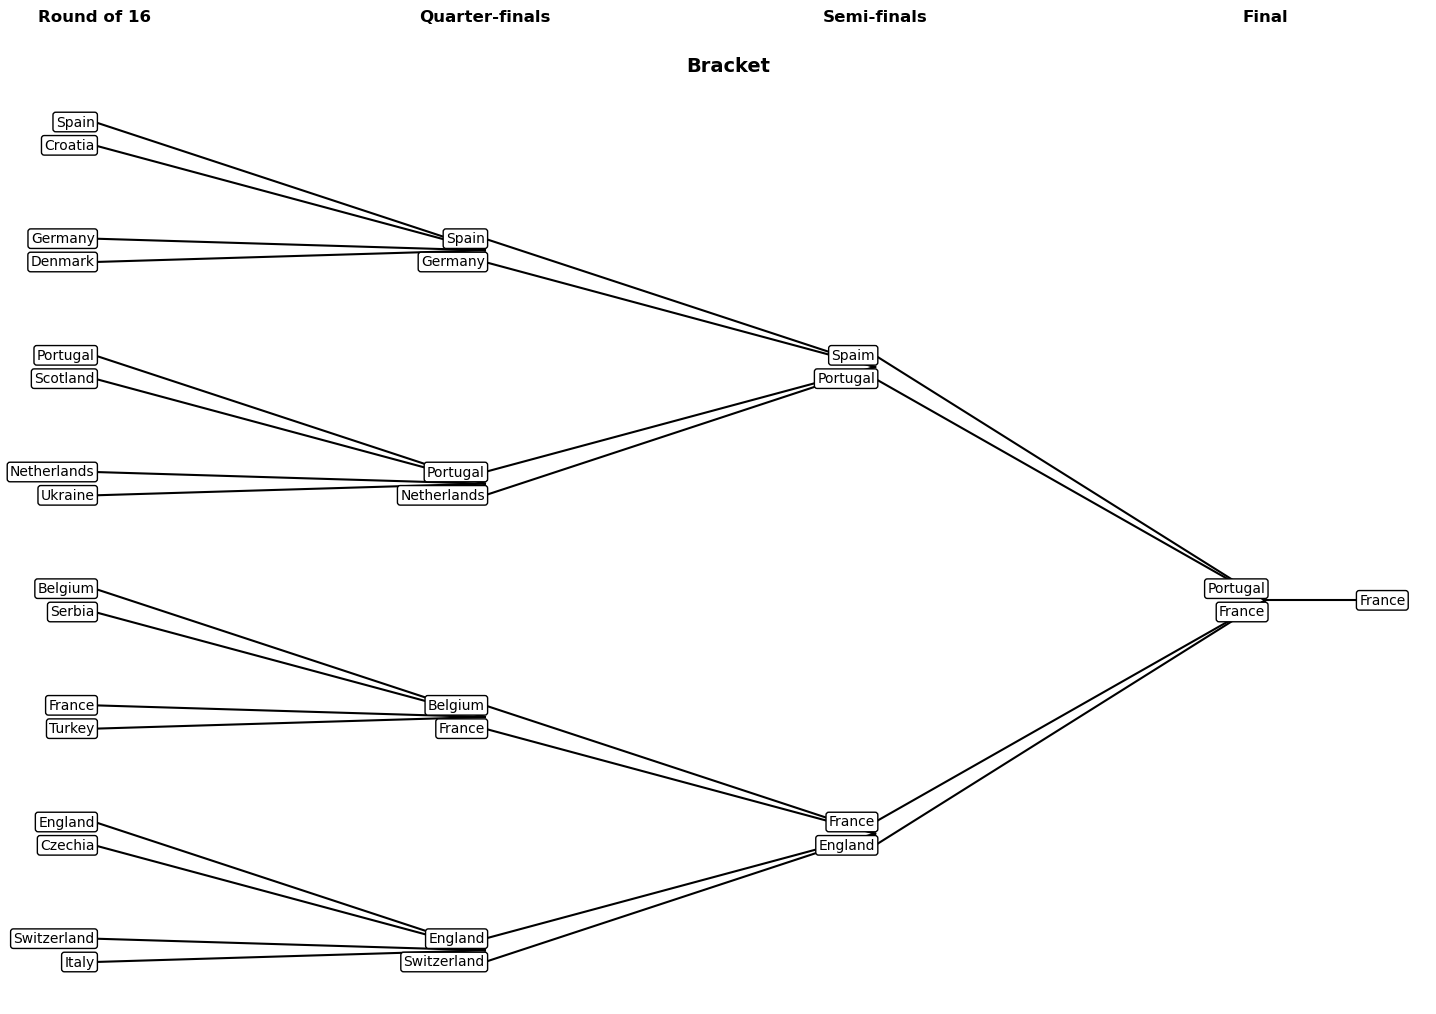

In [76]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_bracket(matches, title="Bracket"):
    fig, ax = plt.subplots(figsize=(18, 12))

    # Turnuva turları
    rounds = ["Round of 16", "Quarter-finals", "Semi-finals", "Final"]

    # Turnuva çizelgesinin X ve Y koordinatlarını belirleyin
    x_positions = [0, 1, 2, 3]
    y_positions = [i for i in range(16, 0, -1)]

    # Maç konumlarını belirleyin
    match_positions = {
        "Round of 16": [(0, y_positions[i*2]) for i in range(8)],
        "Quarter-finals": [(1, y_positions[i*4+2]) for i in range(4)],
        "Semi-finals": [(2, y_positions[i*8+4]) for i in range(2)],
        "Final": [(3, y_positions[8])]
    }

    # Bracket çiz
    for round_name, round_matches in matches.items():
        for i, match in enumerate(round_matches):
            home, away = match

            x, y = match_positions[round_name][i]

            # Takım isimlerini kutular içinde göster
            ax.text(x-0.0, y+0.2, home, ha='right', va='center', fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))
            ax.text(x-0.0, y-0.2, away, ha='right', va='center', fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))

            # Takımlar arasındaki çizgiler
            if round_name != "Final":
                next_x, next_y = match_positions[rounds[rounds.index(round_name) + 1]][i//2]
                ax.plot([x, next_x], [y+0.2, next_y], color='black')
                ax.plot([x, next_x], [y-0.2, next_y], color='black')
            else:
                ax.text(x+0.3, y+0, "France", ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))
                ax.plot([x, x+0.25], [y, y], color='black')  # Çizgi ekle

    # Her bir turu belirten başlıkları ekle
    for i, round_name in enumerate(rounds):
        ax.text(i, 18, round_name, ha='center', va='center', fontsize=12, weight='bold')

    ax.set_title(title, fontsize=14, weight='bold')
    ax.axis('off')
    plt.show()

# Örnek verilerle bracket çizme
matches = {
    "Round of 16": [
         ("Spain", "Croatia"), #match39
         ("Germany", "Denmark"), #match37
         ("Portugal", "Scotland"), #match41
         ("Netherlands", "Ukraine"), #match42 
         ("Belgium", "Serbia"), #match43
         ("France", "Turkey"), #match44
         ("England", "Czechia"), #match40
         ("Switzerland", "Italy") #match38
    ],
    "Quarter-finals": [
        ("Spain", "Germany"), #match45
        ("Portugal", "Netherlands"), #46
        ("Belgium", "France"), #47
        ("England", "Switzerland") #48
    ],
    "Semi-finals": [
        ("Spaim", "Portugal"),
        ("France", "England")
    ],
    "Final": [
        ("Portugal","France")
    ]
}

draw_bracket(matches)
